In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
def check_ML_Grad(ml):
    """
        Check if the mass-to-light ratio is descending
    """

    for i in range(len(ml) -1):
        if ml[i] >= ml[i+1]:
            pass
        else:
            return None

    return 0.0

In [3]:
read = emcee.backends.HDFBackend("ESO325_Lens_Model.h5")

In [4]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [5]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [6]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 70


array([ 1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,
        0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
        0.,  6.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  2.,  0.,  3.,  4.,  0.,  8.,  1.,  0.,  0.,  1.,
        2.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,
        0.,  9.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  7.,  0.,  0.,  0.,
        0.,  0.,  0.,  6.,  3.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  1.,
        3.,  5.,  0., 12.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  5.,  0.,  5.,  0.,  0.,  0.,  0.,  2.,  0.,
        2.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  9.,  4.,  0.,  0.,  1.,  6.,
        6., 10.,  3.,  1.,  1.,  1.,  0.,  0.,  0., 12.,  0.,  8.,  0.,
        0.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  3.,  2.,  0.,  0.,  1.,
        0.,  0.,  2.,  0.,  0.,  7.,  0.,  1.,  0.,  1.,  0.,  4

In [194]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 68


array([ 5.,  0.,  6.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  4.,
        7.,  6., 12.,  0.,  0.,  0.,  0.,  0.,  0., 14., 11.,  0., 13.,
        0.,  0.,  0.,  3., 10.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        0., 15., 13.,  8.,  0., 10., 10.,  0.,  0.,  0.,  0.,  0.,  8.,
       12.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.,  0., 11.,  0.,
        0.,  0.,  0.,  0.,  0., 17.,  0.,  5.,  0., 14.,  0.,  0.,  0.,
        0.,  0.,  0., 12., 16.,  0.,  9., 15.,  0.,  0.,  0.,  0., 16.,
        8.,  0.,  0.,  0., 18.,  0.,  0., 12.,  0.,  0.,  0., 14.,  0.,
        0.,  0.,  0.,  0.,  8.,  0., 10.,  0.,  0.,  0.,  0., 19.,  0.,
        9.,  0.,  0., 14., 12.,  6.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., 10.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  8.,  0.,
        8.,  0., 18., 11., 16.,  2.,  0.,  0., 10.,  0.,  0.,  0.,  0.,
        0., 12., 14., 13.,  4.,  0.,  0., 19., 12.,  0.,  0., 13., 10.,
        0.,  0.,  0.,  0.,  8.,  0.,  0.,  3.,  0.,  4.,  0.,  0

In [8]:
#Corner plots

labels = ["ML_1/2","ML_3", "ML_4", "ML_5", "ML_6", "ML_7", 
                "mag_shear", "phi_shear", "gamma"]

tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.min(tau))
samples = read.get_chain(discard=burnin, flat=True, thin=thin)
log_prob_samples = read.get_log_prob(discard=burnin, flat=True, thin=thin)


print("burn-in: {0}".format(burnin))
print("thin: {0}".format(thin))
print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)
'''
all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)
'''
labels += ["log prob"]
#labels += ["log prob"]

corner.corner(samples, labels=labels);
#plt.savefig("Corner_ESO_lensmodel_only.png", fmt="png")

/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:41: RuntimeWarning: invalid value encountered in less
  m = np.arange(len(taus)) < c * taus
/home/carlos/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py:99: RuntimeWarning: invalid value encountered in greater
  flag = tol * tau_est > n_t


ValueError: cannot convert float NaN to integer

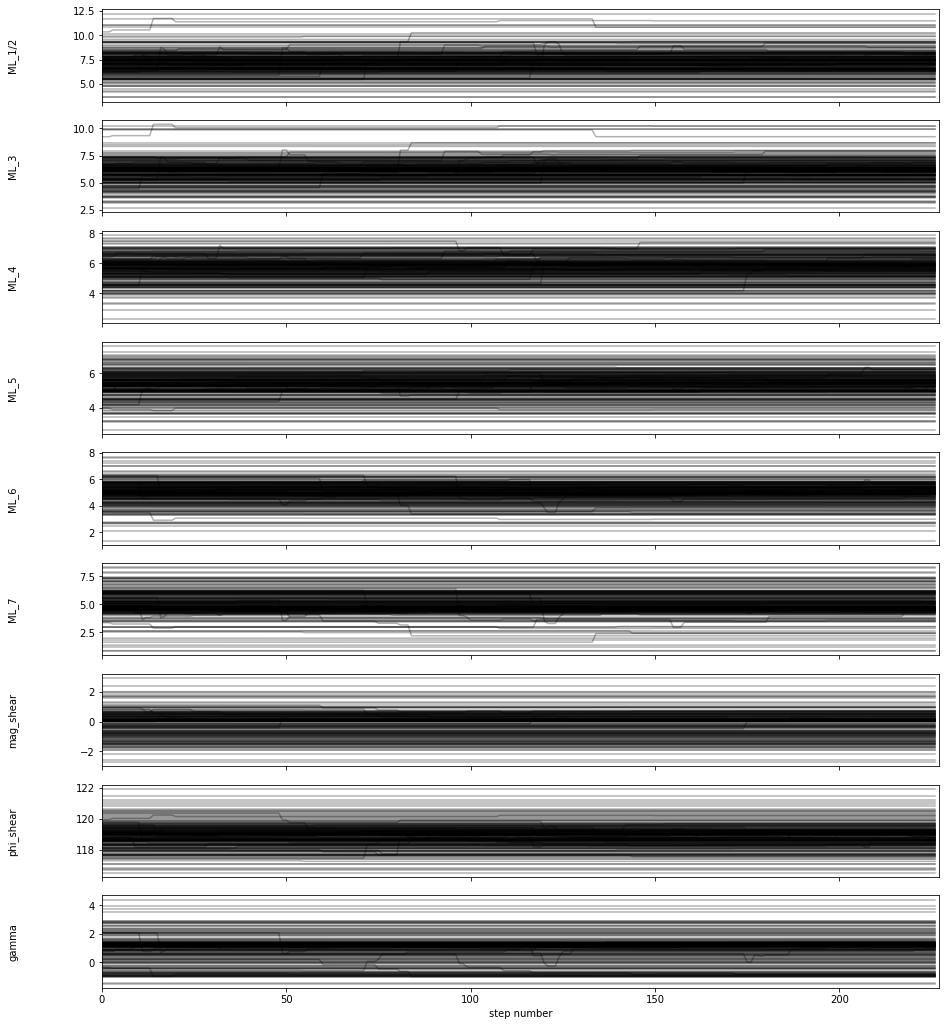

In [10]:
#Walke of each walker
fig, axes = plt.subplots(len(labels), figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels) ):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
#plt.savefig("walkers_ESO_lens_only.png", fmt="png")

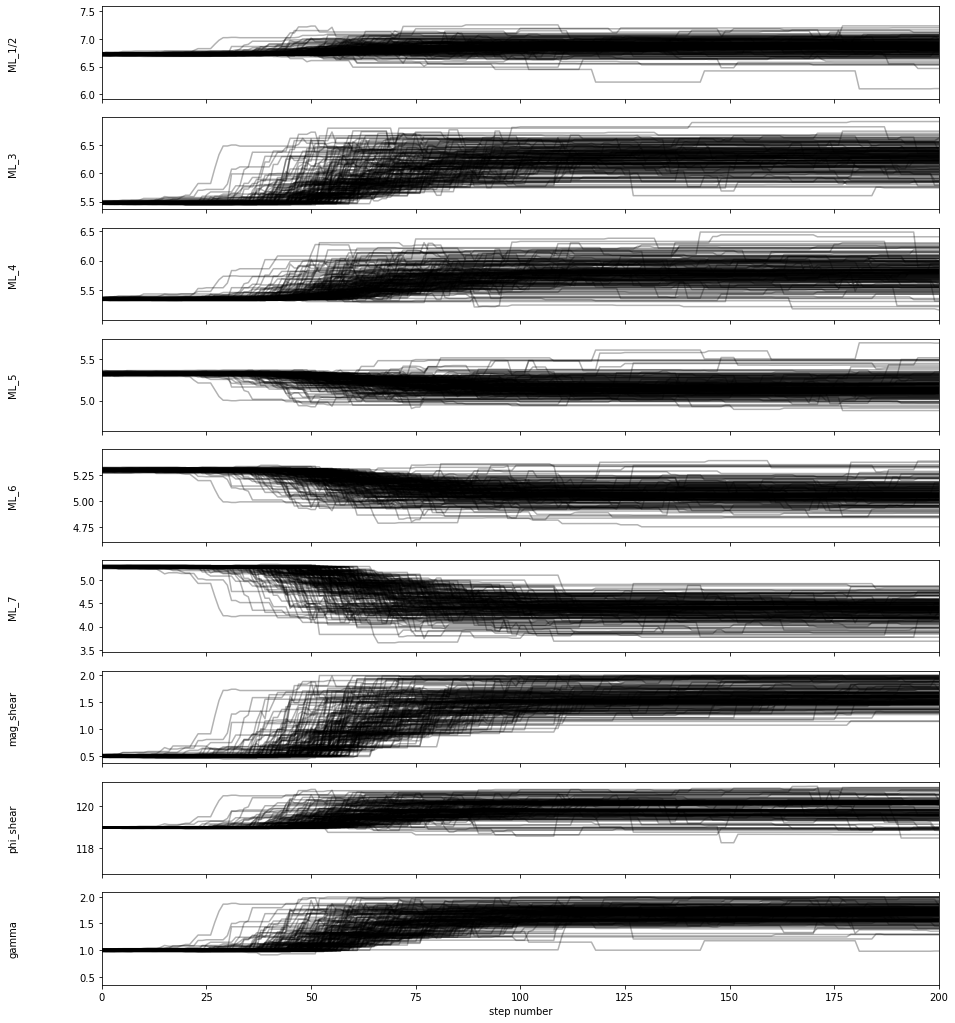

In [100]:
#Same as above, but only in the frist 200 steps
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels) -1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, 200)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");
plt.savefig("walkers_ESO_lens_only_200steps.png", fmt="png")

In [ ]:
tau = read.get_autocorr_time(tol=0)
a = np.mean(tau)


In [137]:
#Print sample/walker, ML ratio, and log_prob of walker 0
print("Sample \t ML \t log_prob")
j = 102                                     #Walker number

ml_12 = np.empty_like(chain.shape[0])
for i in range(1305):
    check = check_ML_Grad(chain[i][j][0:6])
    if check is None:
        print(i+1, chain[i][j], log_prob[i][j], "Not accepeted")
    else:
        print(i+1, chain[i][j], log_prob[i][j], "Accepetd")

Sample 	 ML 	 log_prob
1 [  7.4093813    5.04847433   6.28808809   5.23918558   5.38132975
   4.85912026   0.60136043 118.80252968   1.15236556] -inf Not accepeted
2 [  7.4093813    5.04847433   6.28808809   5.23918558   5.38132975
   4.85912026   0.60136043 118.80252968   1.15236556] -inf Not accepeted
3 [  7.4093813    5.04847433   6.28808809   5.23918558   5.38132975
   4.85912026   0.60136043 118.80252968   1.15236556] -inf Not accepeted
4 [  7.4093813    5.04847433   6.28808809   5.23918558   5.38132975
   4.85912026   0.60136043 118.80252968   1.15236556] -inf Not accepeted
5 [  7.4093813    5.04847433   6.28808809   5.23918558   5.38132975
   4.85912026   0.60136043 118.80252968   1.15236556] -inf Not accepeted
6 [  7.4093813    5.04847433   6.28808809   5.23918558   5.38132975
   4.85912026   0.60136043 118.80252968   1.15236556] -inf Not accepeted
7 [  7.4093813    5.04847433   6.28808809   5.23918558   5.38132975
   4.85912026   0.60136043 118.80252968   1.15236556] -inf Not 

   3.69573323   0.9112467  118.62129203  -0.52466773] -1231.6952464211781 Accepetd
112 [  9.4758732    9.15875816   6.3279126    5.20869467   4.20467118
   3.69573323   0.9112467  118.62129203  -0.52466773] -1231.6952464211781 Accepetd
113 [  9.4758732    9.15875816   6.3279126    5.20869467   4.20467118
   3.69573323   0.9112467  118.62129203  -0.52466773] -1231.6952464211781 Accepetd
114 [  9.4758732    9.15875816   6.3279126    5.20869467   4.20467118
   3.69573323   0.9112467  118.62129203  -0.52466773] -1231.6952464211781 Accepetd
115 [  9.4758732    9.15875816   6.3279126    5.20869467   4.20467118
   3.69573323   0.9112467  118.62129203  -0.52466773] -1231.6952464211781 Accepetd
116 [  9.4758732    9.15875816   6.3279126    5.20869467   4.20467118
   3.69573323   0.9112467  118.62129203  -0.52466773] -1231.6952464211781 Accepetd
117 [  9.4758732    9.15875816   6.3279126    5.20869467   4.20467118
   3.69573323   0.9112467  118.62129203  -0.52466773] -1231.6952464211781 Accepetd

239 [ 11.08835744  10.37906533   6.84196751   4.97624186   3.36126013
   2.6732942    0.93833767 119.09616584  -0.50127056] -1177.5395997377213 Accepetd
240 [ 11.08835744  10.37906533   6.84196751   4.97624186   3.36126013
   2.6732942    0.93833767 119.09616584  -0.50127056] -1177.5395997377213 Accepetd
241 [ 11.08835744  10.37906533   6.84196751   4.97624186   3.36126013
   2.6732942    0.93833767 119.09616584  -0.50127056] -1177.5395997377213 Accepetd
242 [ 11.08835744  10.37906533   6.84196751   4.97624186   3.36126013
   2.6732942    0.93833767 119.09616584  -0.50127056] -1177.5395997377213 Accepetd
243 [ 11.08835744  10.37906533   6.84196751   4.97624186   3.36126013
   2.6732942    0.93833767 119.09616584  -0.50127056] -1177.5395997377213 Accepetd
244 [ 11.08835744  10.37906533   6.84196751   4.97624186   3.36126013
   2.6732942    0.93833767 119.09616584  -0.50127056] -1177.5395997377213 Accepetd
245 [ 11.08835744  10.37906533   6.84196751   4.97624186   3.36126013
   2.6732942

   4.48226416   0.50050264 118.52129833  -0.62785934] -899.2283760853581 Accepetd
358 [  8.32143419   7.71019962   5.87665611   5.6401053    4.72305714
   4.48226416   0.50050264 118.52129833  -0.62785934] -899.2283760853581 Accepetd
359 [  8.32143419   7.71019962   5.87665611   5.6401053    4.72305714
   4.48226416   0.50050264 118.52129833  -0.62785934] -899.2283760853581 Accepetd
360 [  8.32143419   7.71019962   5.87665611   5.6401053    4.72305714
   4.48226416   0.50050264 118.52129833  -0.62785934] -899.2283760853581 Accepetd
361 [  8.32143419   7.71019962   5.87665611   5.6401053    4.72305714
   4.48226416   0.50050264 118.52129833  -0.62785934] -899.2283760853581 Accepetd
362 [  8.32143419   7.71019962   5.87665611   5.6401053    4.72305714
   4.48226416   0.50050264 118.52129833  -0.62785934] -899.2283760853581 Accepetd
363 [  8.32143419   7.71019962   5.87665611   5.6401053    4.72305714
   4.48226416   0.50050264 118.52129833  -0.62785934] -899.2283760853581 Accepetd
364 [ 

   3.47967962   0.98917256 118.09038224  -0.96587595] -405.696996647893 Accepetd
488 [  9.56457068   8.33240156   6.45945491   5.85387062   4.27481727
   3.47967962   0.98917256 118.09038224  -0.96587595] -405.696996647893 Accepetd
489 [  9.56457068   8.33240156   6.45945491   5.85387062   4.27481727
   3.47967962   0.98917256 118.09038224  -0.96587595] -405.696996647893 Accepetd
490 [  9.56457068   8.33240156   6.45945491   5.85387062   4.27481727
   3.47967962   0.98917256 118.09038224  -0.96587595] -405.696996647893 Accepetd
491 [  9.56457068   8.33240156   6.45945491   5.85387062   4.27481727
   3.47967962   0.98917256 118.09038224  -0.96587595] -405.696996647893 Accepetd
492 [  9.56457068   8.33240156   6.45945491   5.85387062   4.27481727
   3.47967962   0.98917256 118.09038224  -0.96587595] -405.696996647893 Accepetd
493 [  9.56457068   8.33240156   6.45945491   5.85387062   4.27481727
   3.47967962   0.98917256 118.09038224  -0.96587595] -405.696996647893 Accepetd
494 [  9.5645

IndexError: index 562 is out of bounds for axis 0 with size 562

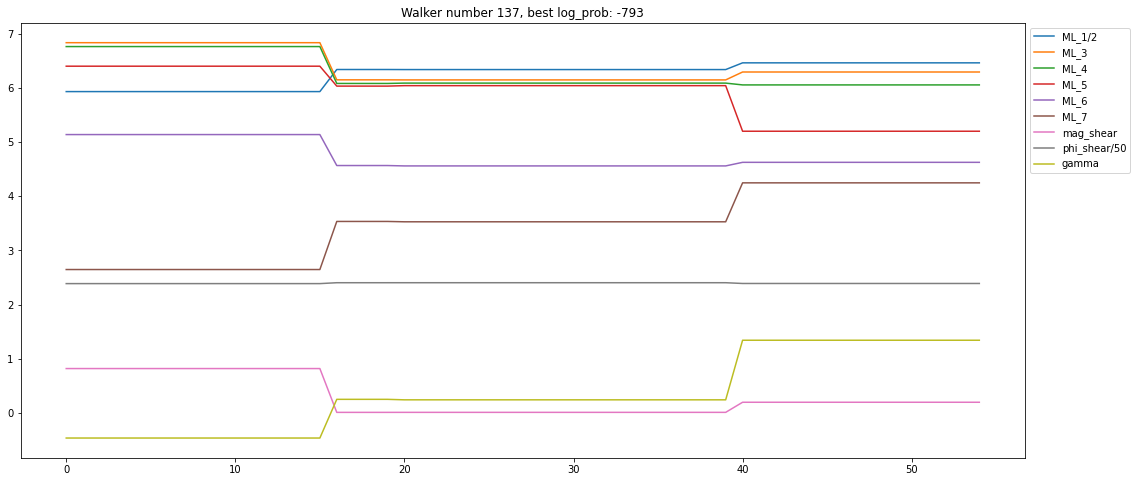

In [109]:
labels = ["ML_1/2","ML_3", "ML_4", "ML_5", "ML_6", "ML_7", 
                "mag_shear", "phi_shear", "gamma"]
plt.figure(figsize=(18,8))
for i in range(len(labels)):
    if labels[i] == "phi_shear":
        plt.plot(chain[:, 100, i]/50, label=labels[i]+"/50")
    else:
        plt.plot(chain[:, 100, i], label=labels[i])
    
plt.vlines(x=100, ymin=0, ymax=7, label="Accp Fraction = 1.528500e-01", ls="--", color="r")
plt.vlines(x=200, ymin=0, ymax=7, label="Accp Fraction = 9.915000e-02", ls="--", color="r")
    
plt.vlines(x=586, ymin=0, ymax=7, label="log_prob = -796", ls="--")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Walker number 137, best log_prob: -793")
plt.savefig("walker_137_best_walker.png", fmt="png")
plt.show()

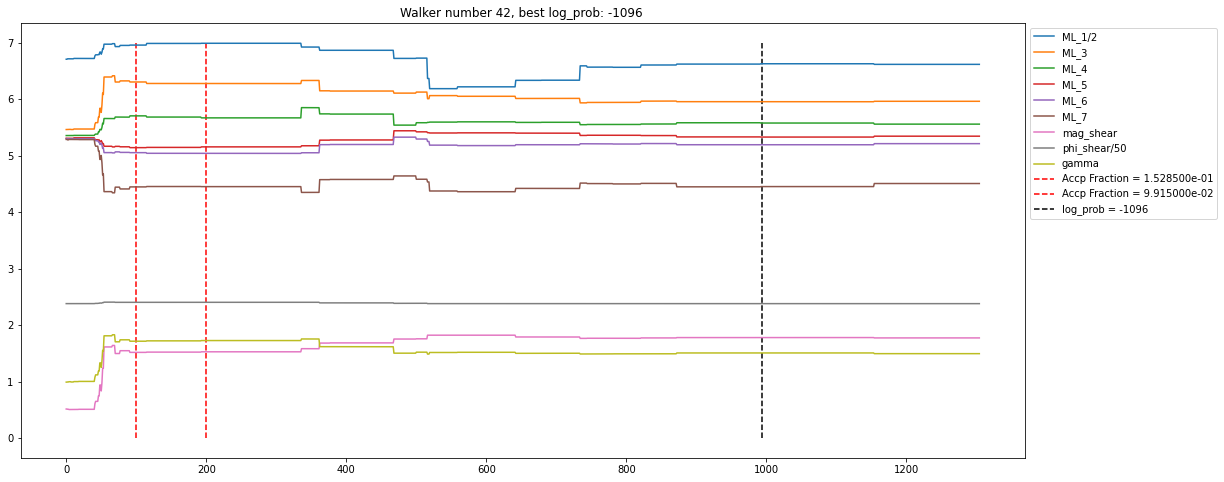

In [94]:
labels = ["ML_1/2","ML_3", "ML_4", "ML_5", "ML_6", "ML_7", 
                "mag_shear", "phi_shear", "gamma"]
j = 42       #walker number
plt.figure(figsize=(18,8))
for i in range(len(labels)):
    if labels[i] == "phi_shear":
        plt.plot(chain[:, j, i]/50, label=labels[i]+"/50")
    else:
        plt.plot(chain[:, j, i], label=labels[i])

        
plt.vlines(x=100, ymin=0, ymax=7, label="Accp Fraction = 1.528500e-01", ls="--", color="r")
plt.vlines(x=200, ymin=0, ymax=7, label="Accp Fraction = 9.915000e-02", ls="--", color="r")

plt.vlines(x=993, ymin=0, ymax=7, label="log_prob = -1096", ls="--")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title("Walker number %i, best log_prob: -1096 "%j)
plt.savefig("walker_%i_best_walker.png"%j, fmt="png")
plt.show()

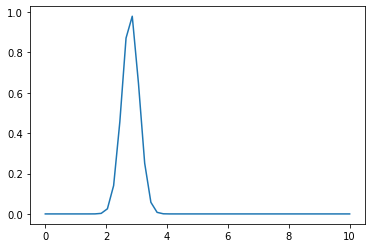

In [7]:
x = np.linspace(0,10)
plt.plot(x, np.exp(- ((x-2.8)**2)/((2*(2.8*0.1)**2)) ))

In [5]:
def next_pow_two(n):
    i = 1
    while i < n:
        i = i << 1
    return i


def autocorr_func_1d(x, norm=True):
    x = np.atleast_1d(x)
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x))

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2 * n)
    acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
    acf /= 4 * n

    # Optionally normalize
    if norm:
        acf /= acf[0]

    return acf

# Automated windowing procedure following Sokal (1989)
def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1


# Following the suggestion from Goodman & Weare (2010)
def autocorr_gw2010(y, c=5.0):
    f = autocorr_func_1d(np.mean(y, axis=0))
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]


def autocorr_new(y, c=5.0):
    f = np.zeros(y.shape[1])
    for yy in y:
        f += autocorr_func_1d(yy)
    f /= len(y)
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]

In [206]:
import emcee


def log_prob(p):
    return np.logaddexp(-0.5 * np.sum(p ** 2), -0.5 * np.sum((p - 4.0) ** 2))


sampler = emcee.EnsembleSampler(32, 3, log_prob)
sampler.run_mcmc(
    np.concatenate((np.random.randn(16, 3), 4.0 + np.random.randn(16, 3)), axis=0),
    50000,
    progress=True,
);

100%|██████████| 50000/50000 [03:04<00:00, 271.28it/s]


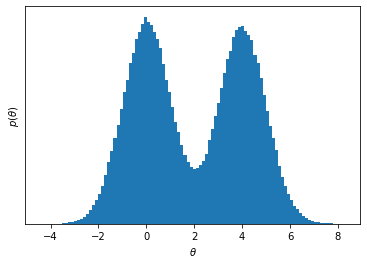

In [122]:
chain = sampler.get_chain()[:, :, 0].T

plt.hist(chain.flatten(), 100)
plt.gca().set_yticks([])
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$");

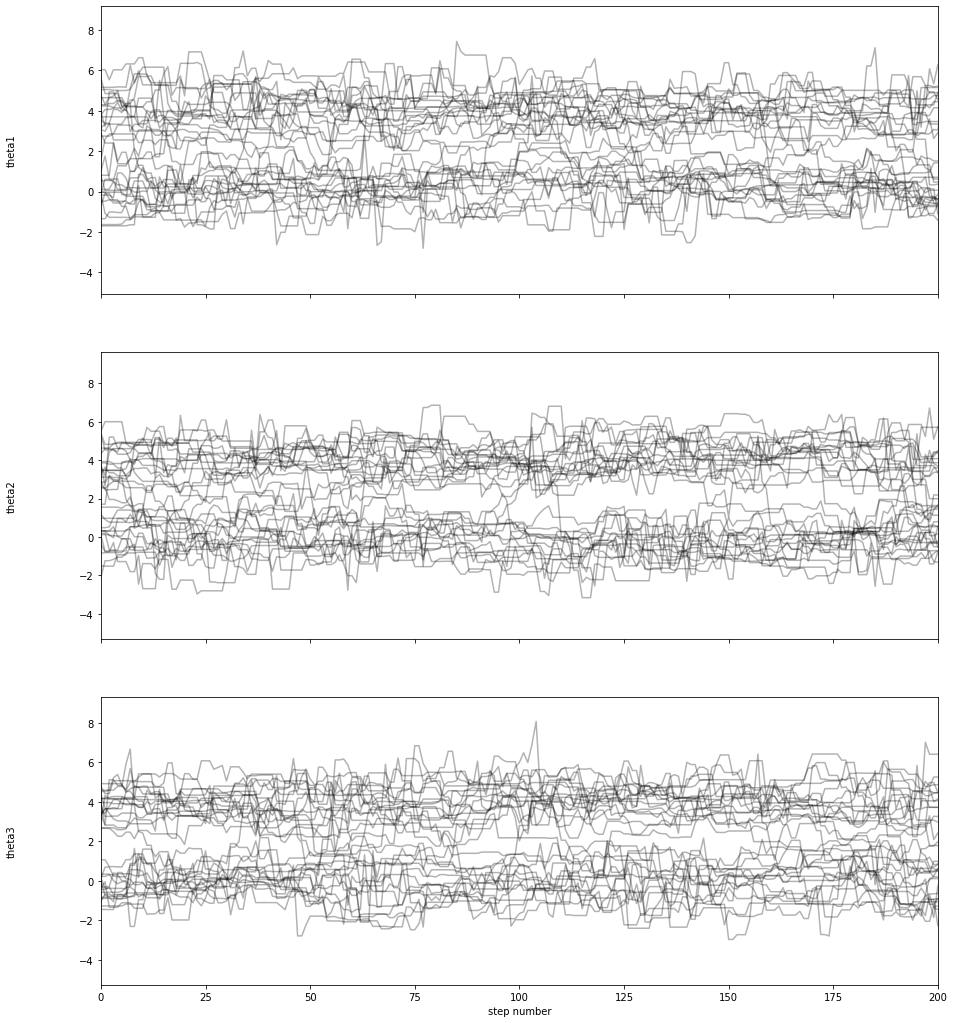

In [209]:
#Walke of each walker
labels = ["theta1", "theta2", "theta3"]
fig, axes = plt.subplots(len(labels), figsize=(15, 18), sharex=True)
samples = sampler.get_chain()

for i in range(len(labels)):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, 200)
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [4]:
chain = read.get_chain()[:, :, 0].T

/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/carlos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


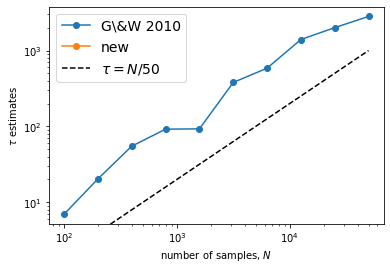

In [6]:
# Compute the estimators for a few different chain lengths
N = np.exp(np.linspace(np.log(100), np.log(chain.shape[1]), 10)).astype(int)

gw2010 = np.empty(len(N))
new = np.empty(len(N))

for i, n in enumerate(N):
    gw2010[i] = autocorr_gw2010(chain[:, :n])
    new[i] = autocorr_new(chain[:, :n])

# Plot the comparisons
plt.loglog(N, gw2010, "o-", label="G\&W 2010")
plt.loglog(N, new, "o-", label="new")
ylim = plt.gca().get_ylim()
plt.plot(N, N / 50.0, "--k", label=r"$\tau = N/50$")
plt.ylim(ylim)
plt.xlabel("number of samples, $N$")
plt.ylabel(r"$\tau$ estimates")
plt.legend(fontsize=14);



In [131]:
a = read.get_chain()

In [135]:
a[:,:,0]

array([[6.71266947, 6.71995792, 6.7199138 , ..., 6.75034677, 6.72096611,
        6.71249753],
       [6.71557122, 6.71995792, 6.7199138 , ..., 6.72981092, 6.72318168,
        6.71407096],
       [6.71557122, 6.71992002, 6.7199138 , ..., 6.72981092, 6.72481945,
        6.71407096],
       ...,
       [6.77413276, 6.70774177, 6.70508014, ..., 6.00087067, 6.71980212,
        6.78857358],
       [6.77413276, 6.70774177, 6.70508014, ..., 6.00087067, 6.71980212,
        6.78857358],
       [6.77413276, 6.70774177, 6.70508014, ..., 6.00087067, 6.71980212,
        6.78857358]])

In [8]:
ml = np.array([6.72, 5.48, 5.36, 5.32, 5.30, 5.29])
mag_shear = np.array([0.5])
phi_shear = np.array([119])
gamma = np.array([1.0])


"""
    Pay close attention to the order in which the components are added. 
    They must follow the log_probability unpacking order.
"""


#Initial Positions of walkers
##Here we append all the variables and stds in a single array.
p0 = np.append(ml, mag_shear)
p0 = np.append(p0,[phi_shear, gamma])

#number of walkers
nwalkers = 200   

#Finally we initialize the walkers with position around the best values above
pos = p0 + 1e-2 * np.random.randn(nwalkers, p0.size)

In [64]:
1e-2 * np.random.randn(nwalkers, p0.size)

array([[ 0.01401925, -0.00998257,  0.00023904, ...,  0.02605047,
        -0.01699723, -0.00095484],
       [ 0.00374834,  0.02029376,  0.00061171, ..., -0.0101542 ,
         0.01646281,  0.0082119 ],
       [ 0.01842349,  0.01275036, -0.01165308, ...,  0.00985365,
         0.0044694 , -0.01444948],
       ...,
       [ 0.00473108, -0.00117104, -0.00700933, ..., -0.01544015,
        -0.00815194, -0.01759463],
       [ 0.00573879,  0.01255322, -0.01395839, ...,  0.00122264,
         0.00574365, -0.01139746],
       [ 0.0034691 , -0.01193196, -0.00672652, ..., -0.01461481,
        -0.00891514,  0.00285594]])

In [44]:
np.random.randn(nwalkers, p0.size)

array([[-1.62249629,  1.10443789, -1.2386059 , ..., -0.01506423,
        -0.56071326,  0.94818208],
       [-0.8465576 ,  1.06328064, -0.0112489 , ...,  0.94629593,
        -0.42075108, -0.83649437],
       [-1.44525784,  0.90093532,  0.22556769, ..., -0.00997676,
         0.4091513 ,  0.16511967],
       ...,
       [-1.11804482, -1.37270658, -0.47749787, ..., -1.89011312,
         1.45541058,  0.26940442],
       [-0.18591078,  0.55116254,  0.72479407, ..., -0.545765  ,
        -0.57826054, -0.15805764],
       [-0.64502706, -0.08886959,  1.23593093, ...,  1.66640466,
         0.42918481,  1.20174731]])